In [214]:
import json
import os
import shutil
import pandas as pd
from pandas.io.json import json_normalize
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from matplotlib import pyplot

# JSON => DataFrame 변환

In [183]:
json_dir = './json(0_22000)/'

In [184]:
df = pd.DataFrame()
directory = os.listdir(json_dir)
for json_i in directory:
    with open(json_dir + json_i) as json_file:
        json_data = json.load(json_file)
        df = df.append(pd.DataFrame.from_dict(json_normalize(json_data), orient = 'columns'))

<ipython-input-184-e5d0262296b6>:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = df.append(pd.DataFrame.from_dict(json_normalize(json_data), orient = 'columns'))


In [185]:
df = df.reset_index()

In [186]:
df = df.drop(df[['index', 'shapes', 'version', 'imageHeight', 'imageWidth', 'imageData']], axis = 1)

In [187]:
df

imagePath  flags.root  flags.branch  flags.fruit  flags.leaves  \
0       3721.png       False         False        False          True   
1       2833.png        True         False        False          True   
2        729.png       False         False        False          True   
3      16030.png       False         False        False          True   
4       6523.png       False         False        False          True   
...          ...         ...           ...          ...           ...   
10075  21012.png       False         False        False          True   
10076   9587.png       False         False        False          True   
10077    478.png       False         False        False          True   
10078   6672.png        True          True        False          True   
10079   7960.png       False         False        False         False   

      flags.knot  flags.willow  flags.keyhole  
0          False         False          False  
1          False         False          False  
2          False         False          False  
3           True         False          False  
4          False         False          False  
...          ...           ...            ...  
10075       True         False          False  
10076      False         False          False  
10077      False         False          False  
10078       True         False          False  
10079      False         False           True  

[10080 rows x 8 columns]

In [188]:
df['y'] = ''

In [189]:
df

imagePath  flags.root  flags.branch  flags.fruit  flags.leaves  \
0       3721.png       False         False        False          True   
1       2833.png        True         False        False          True   
2        729.png       False         False        False          True   
3      16030.png       False         False        False          True   
4       6523.png       False         False        False          True   
...          ...         ...           ...          ...           ...   
10075  21012.png       False         False        False          True   
10076   9587.png       False         False        False          True   
10077    478.png       False         False        False          True   
10078   6672.png        True          True        False          True   
10079   7960.png       False         False        False         False   

      flags.knot  flags.willow  flags.keyhole y   
0          False         False          False     
1          False         False          False     
2          False         False          False     
3           True         False          False     
4          False         False          False     
...          ...           ...            ... ..  
10075       True         False          False     
10076      False         False          False     
10077      False         False          False     
10078       True         False          False     
10079      False         False           True     

[10080 rows x 9 columns]

타겟값 y: 특이점 존재 여부 판별

flags.fruit', flags.knot', 'flags.willow', 'flags.keyhole' column 값 중 하나라도 True인 경우 1, 아닐 경우 0으로 부여

In [190]:
for i in df.index : 
    if (df.loc[i, 'flags.fruit'] == True) | (df.loc[i, 'flags.knot'] == True) | (df.loc[i, 'flags.willow'] == True) | (df.loc[i, 'flags.keyhole'] == True):
        df.loc[i, 'y'] = 1
    else :
        df.loc[i, 'y'] = 0

In [191]:
df

imagePath  flags.root  flags.branch  flags.fruit  flags.leaves  \
0       3721.png       False         False        False          True   
1       2833.png        True         False        False          True   
2        729.png       False         False        False          True   
3      16030.png       False         False        False          True   
4       6523.png       False         False        False          True   
...          ...         ...           ...          ...           ...   
10075  21012.png       False         False        False          True   
10076   9587.png       False         False        False          True   
10077    478.png       False         False        False          True   
10078   6672.png        True          True        False          True   
10079   7960.png       False         False        False         False   

      flags.knot  flags.willow  flags.keyhole  y  
0          False         False          False  0  
1          False         False          False  0  
2          False         False          False  0  
3           True         False          False  1  
4          False         False          False  0  
...          ...           ...            ... ..  
10075       True         False          False  1  
10076      False         False          False  0  
10077      False         False          False  0  
10078       True         False          False  1  
10079      False         False           True  1  

[10080 rows x 9 columns]

In [195]:
def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()
    
data = df.values
X = data[:, :-1] 
y = data[:, -1]

In [196]:
X

array([['3721.png', False, False, ..., False, False, False],
       ['2833.png', True, False, ..., False, False, False],
       ['729.png', False, False, ..., False, False, False],
       ...,
       ['478.png', False, False, ..., False, False, False],
       ['6672.png', True, True, ..., True, False, False],
       ['7960.png', False, False, ..., False, False, True]], dtype=object)

In [202]:
y = y.astype('int')

Class=0, n=8927 (88.562%)
Class=1, n=1153 (11.438%)


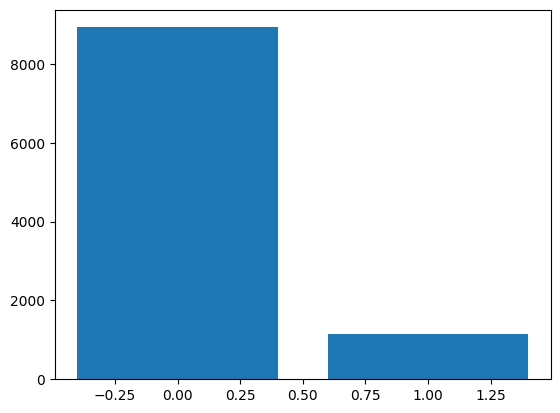

In [197]:
count_and_plot(y)

Class=0, n=1153 (50.000%)
Class=1, n=1153 (50.000%)


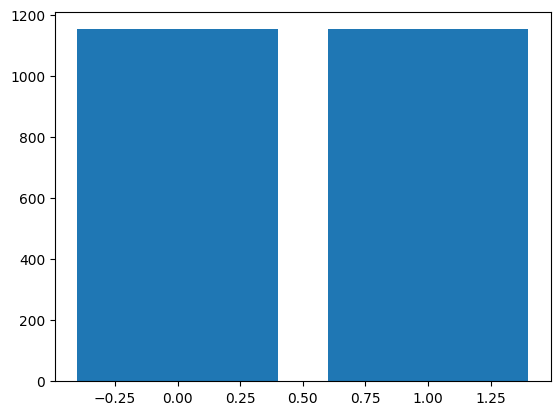

In [203]:
X_resampled, y_resampled = RandomUnderSampler(random_state=0).fit_resample(X, y)
count_and_plot(y_resampled)

In [210]:
df.columns

Index(['imagePath', 'flags.root', 'flags.branch', 'flags.fruit',
       'flags.leaves', 'flags.knot', 'flags.willow', 'flags.keyhole', 'y'],
      dtype='object')

In [211]:
df_under = pd.DataFrame(data = X_resampled,
                        columns=['imagePath', 'flags.root', 'flags.branch', 'flags.fruit','flags.leaves', 'flags.knot', 'flags.willow', 'flags.keyhole'])

In [212]:
df_under

imagePath flags.root flags.branch flags.fruit flags.leaves flags.knot  \
0      8043.png      False        False       False         True      False   
1      4069.png      False         True       False         True      False   
2      2482.png      False        False       False         True      False   
3      1226.png      False        False       False         True      False   
4      7255.png       True         True       False         True      False   
...         ...        ...          ...         ...          ...        ...   
2301   9211.png      False        False       False         True       True   
2302   7825.png       True         True       False         True       True   
2303  21012.png      False        False       False         True       True   
2304   6672.png       True         True       False         True       True   
2305   7960.png      False        False       False        False      False   

     flags.willow flags.keyhole  
0           False         False  
1           False         False  
2           False         False  
3           False         False  
4           False         False  
...           ...           ...  
2301        False         False  
2302        False         False  
2303        False         False  
2304        False         False  
2305        False          True  

[2306 rows x 8 columns]

In [215]:
df_under.to_csv('df_under.csv')

ValueError: could not convert string to float: '3721.png'